*Hi all, 
This is a beginners' work. Feel Free to upvote it if you like. 
Also improvements and changes would be highly appreciated.
Thank you!!!*

## Work Done in this Kernel
* Importing file and cleaning Data
* **Dashboard to search for restaurant According To Their Name,location,rating,cost for two**.(Do Check it!!!)
* Analysis of Restaurant based on - 

    1. Their Rating 
    2. Online Delivery
    3. Their Type whether Bar,Dinner, buffet etc
    4. Table Booking facility
    5. Single Cuisine type or Multi Cuisine Type
    6. Most Liked Dishes
    7. Largest Number of Food Chains in Bangalore
    8. Average Price for Two peope
    
***if you feel there is something still left to analyse let me know***

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('../input/zomato.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# DATA CLEANING

In [5]:
#Removing unnecessary data such as url, address and phone columns from DataFrame

In [6]:
del data['url']
del data['address']
del data['phone']

In [7]:
#Replacing restaurants with their ratings given as New to NAN and dropping them finally 
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [8]:
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))
data['rate'] = data['rate'].apply(lambda r: float(r))

In [9]:
#Conversion of Cost from String to Integer
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',','')
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(int)

In [10]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Dashboard to search for restaurant According To Their Name,location,rating,cost for two.

In [11]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



In [12]:
location=['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whitefield',
       'Koramangala 2nd Block', 'Koramangala 3rd Block',
       'Koramangala 4th Block', 'Koramangala', 'Bommanahalli',
       'Hosur Road', 'Seshadripuram', 'Electronic City', 'Banaswadi',
       'North Bangalore', 'RT Nagar', 'Kammanahalli', 'Hennur',
       'HBR Layout', 'Kalyan Nagar', 'Thippasandra', 'CV Raman Nagar',
       'Kaggadasapura', 'Kanakapura Road', 'Nagawara', 'Rammurthy Nagar',
       'Sankey Road', 'Central Bangalore', 'Malleshwaram',
       'Sadashiv Nagar', 'Basaveshwara Nagar', 'Rajajinagar',
       'New BEL Road', 'West Bangalore', 'Yeshwantpur', 'Sanjay Nagar',
       'Sahakara Nagar', 'Jalahalli', 'Yelahanka', 'Magadi Road',
       'KR Puram']
location.sort()
print("Search Restaurants according to their name")
@interact
def show_articles_more_than(Restaurant_Name=''):
    return data[data['name'].str.contains(Restaurant_Name)]




,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari


*Search Restaurant According To your requirements*
* Location - Chose Any location where you want to go
* Type - Chose the type of Restaurant where you want to go whether cafe,pub etc
* Min_Rating - Select the minimum rating which you want, search results will have atleast rating searched or more than that
* Max_Cost_For_two - Select the max cost for two people and it will show restaurants having that much cost or below it.

In [13]:
@interact
def show_Restaurants_according_to_search(Location=location,
                                         Restaurant_Type=['Buffet', 
                                             'Cafes',
                                             'Delivery',
                                             'Desserts',
                                             'Dine-out',
                                             'Drinks & nightlife',
                                             'Pubs and bars'],
                            Min_Rating=(0,5,0.1),
                            Max_Cost_For_Two_People=(100,5000,50)):
    print("")
    return data[ (data['rate'] > Min_Rating) 
                &(data['listed_in(type)'] == Restaurant_Type) 
                &(data['location'] == Location) 
                & (data['approx_cost(for two people)'] < Max_Cost_For_Two_People)]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
879,Sankranthi Veg Restaurant,Yes,No,3.0,102,BTM,Casual Dining,"Tea, Vada Sambar, Masala Dosa","South Indian, North Indian, Chinese",600,"[('Rated 3.0', ""RATED\n So we ended up here o...","['Jeera Rice', 'Veg Pulao', 'Veg Hyderabadi Bi...",Buffet,Bannerghatta Road
8260,AB's - Absolute Barbecues,No,Yes,4.9,6375,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600,"[('Rated 5.0', 'RATED\n We liked the place a ...",[],Buffet,BTM
8261,The Globe Grub,No,Yes,4.4,201,BTM,Casual Dining,"Prawn, Shahi Tukda, Barfi, Veg Mushroom, Pizza...","Continental, North Indian, Asian, Italian",1300,"[('Rated 4.0', 'RATED\n The globe grub the am...",[],Buffet,BTM
8262,Punjabi by Nature 2.0,Yes,Yes,4.2,3230,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,1600,"[('Rated 3.0', ""RATED\n It has a beautiful am...",[],Buffet,BTM
8263,"3B's - Buddies, Bar & Barbecues",No,Yes,4.4,1149,BTM,"Casual Dining, Bar","Paan Ice Cream, Cocktails, Fish Grill, Crispy ...","North Indian, Mediterranean, European, BBQ",1100,"[('Rated 1.0', 'RATED\n Worst buffet dinner I...",[],Buffet,BTM
8264,Savoury Restaurant,Yes,No,3.9,420,BTM,Casual Dining,"Shawarma, Bamboo Biryani, Chicken Shawarama, C...","Arabian, North Indian, Chinese, Fast Food",800,"[('Rated 4.0', 'RATED\n my review 11th januar...",[],Buffet,BTM
8265,Sankranthi Veg Restaurant,Yes,No,3.0,102,BTM,Casual Dining,"Tea, Vada Sambar, Masala Dosa","South Indian, North Indian, Chinese",600,"[('Rated 3.0', ""RATED\n So we ended up here o...",[],Buffet,BTM
19393,AB's - Absolute Barbecues,No,Yes,4.9,6404,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600,"[('Rated 5.0', ""RATED\n Best place for buffet...",[],Buffet,Jayanagar
19399,"3B's - Buddies, Bar & Barbecues",No,Yes,4.4,1154,BTM,"Casual Dining, Bar","Paan Ice Cream, Cocktails, Fish Grill, Crispy ...","North Indian, Mediterranean, European, BBQ",1100,"[('Rated 1.0', 'RATED\n Worst buffet dinner I...",[],Buffet,Jayanagar
21770,AB's - Absolute Barbecues,No,Yes,4.9,6404,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600,"[('Rated 5.0', ""RATED\n Best place for buffet...",[],Buffet,JP Nagar


# Analysis of Restaurants based on their Online Delivery

In [14]:
print("No. of restaurants with online delivery:")
(data.online_order == 'Yes').sum()

No. of restaurants with online delivery:


16387

In [15]:
print("No. of restaurants which does not deliver online:")
(data.online_order == 'No').sum()

No. of restaurants which does not deliver online:


6872

In [16]:
data.name.count()

23259

Text(0.5, 1.0, 'Restaurants delivering online or Not')

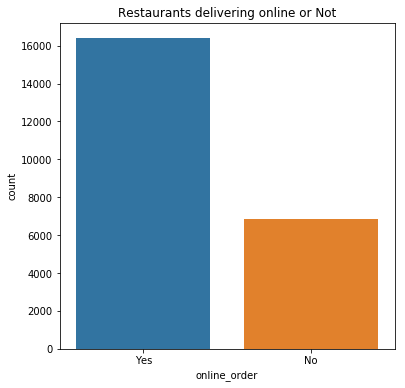

In [17]:
sns.countplot(x=data['online_order'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Restaurants delivering online or Not')

Text(0.5, 1.0, 'Type of Restaurants delivering online or Not')

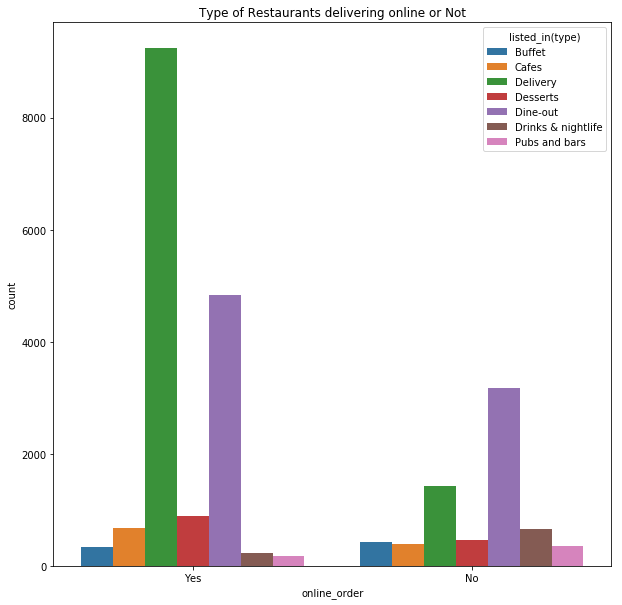

In [18]:
sns.countplot(x=data['online_order'], hue = data['listed_in(type)'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type of Restaurants delivering online or Not')

# Analysis of Restaurants based on their Table booking facility

In [19]:
print("No. of restaurants with table booking facility:")
(data.book_table == 'Yes').sum()

No. of restaurants with table booking facility:


6061

In [20]:
print("No. of restaurants with table booking facility:")
(data.book_table == 'No').sum()

No. of restaurants with table booking facility:


17198

Text(0.5, 1.0, 'Restaurants providing Table booking facility:')

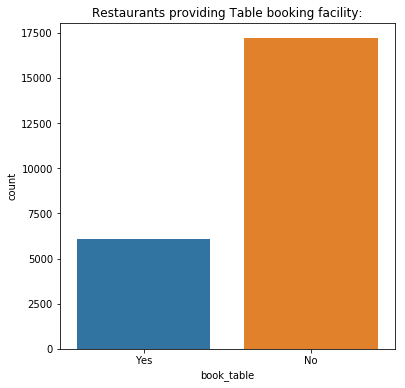

In [21]:
sns.countplot(x=data['book_table'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Restaurants providing Table booking facility:')

Text(0.5, 1.0, 'Type Of Restaurants providing Table booking facility:')

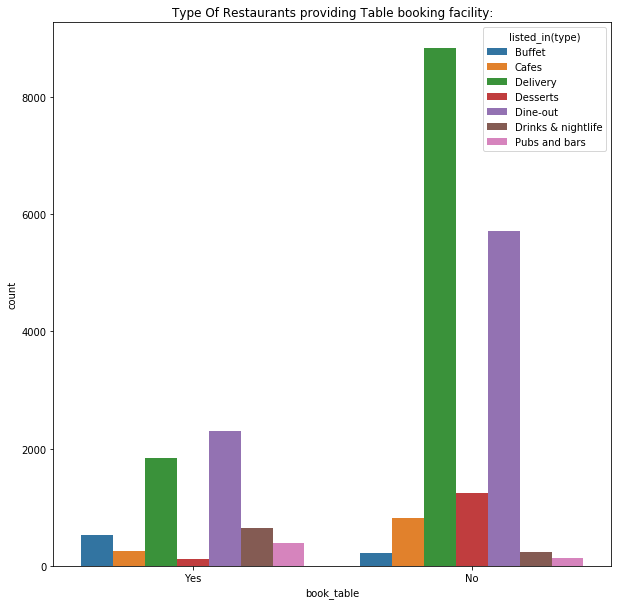

In [22]:
sns.countplot(x=data['book_table'],hue = data['listed_in(type)'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type Of Restaurants providing Table booking facility:')

# Analysis of Restaurants based on their Ratings

In [23]:
print("All unique restaurants ratings:")
data.rate.unique()


All unique restaurants ratings:


array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [24]:
print("no. of restaurants between 1.5 and 2 rating:")
((data.rate>=1.5) & (data.rate<2)).sum()

no. of restaurants between 1.5 and 2 rating:


5

In [25]:
print("no. of restaurants between 2.5 and 3 rating:")
((data.rate>=2.5) & (data.rate<3)).sum()

no. of restaurants between 2.5 and 3 rating:


1019

In [26]:
print("no. of restaurants between 2 and 2.5 rating:")
((data.rate>=2) & (data.rate<2.5)).sum()

no. of restaurants between 2 and 2.5 rating:


160

In [27]:
print("no. of restaurants between 3.0 and 3.5 rating:")
((data.rate>=3.0) & (data.rate<3.5)).sum()

no. of restaurants between 3.0 and 3.5 rating:


1418

In [28]:
print("no. of restaurants between 3.5 and 4 rating:")
((data.rate>=3.5) & (data.rate<4)).sum()

no. of restaurants between 3.5 and 4 rating:


8740

In [29]:
print("no. of restaurants between 4 and 4.5 rating:")
((data.rate>=4) & (data.rate<4.5)).sum()

no. of restaurants between 4 and 4.5 rating:


10681

In [30]:
print("no. of restaurants between 4.5 and 5 rating:")
((data.rate>=4.5) & (data.rate<5)).sum()

no. of restaurants between 4.5 and 5 rating:


1236

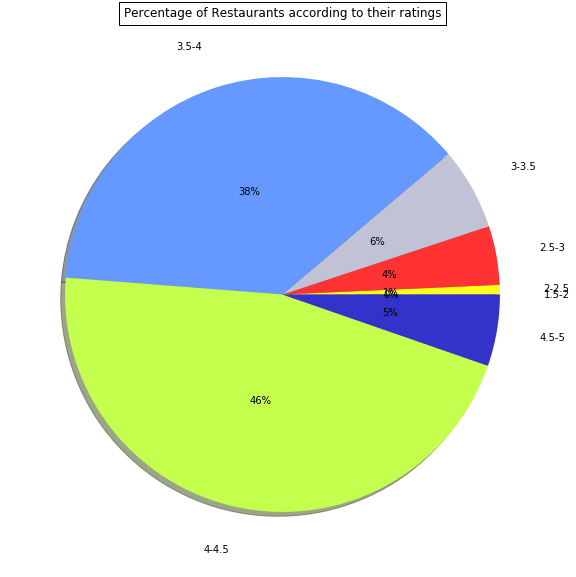

In [31]:
slices=[((data.rate>=1.5) & (data.rate<2)).sum(),
        ((data.rate>=2) & (data.rate<2.5)).sum(),
        ((data.rate>=2.5) & (data.rate<3)).sum(),
        ((data.rate>=3.0) & (data.rate<3.5)).sum(),
        ((data.rate>=3.5) & (data.rate<4)).sum(),
        ((data.rate>=4) & (data.rate<4.5)).sum(),
        ((data.rate>=4.5) & (data.rate<5)).sum()
       ]
labels=['1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

* Analysis of Restaurants based on their online order and how rating is related to it

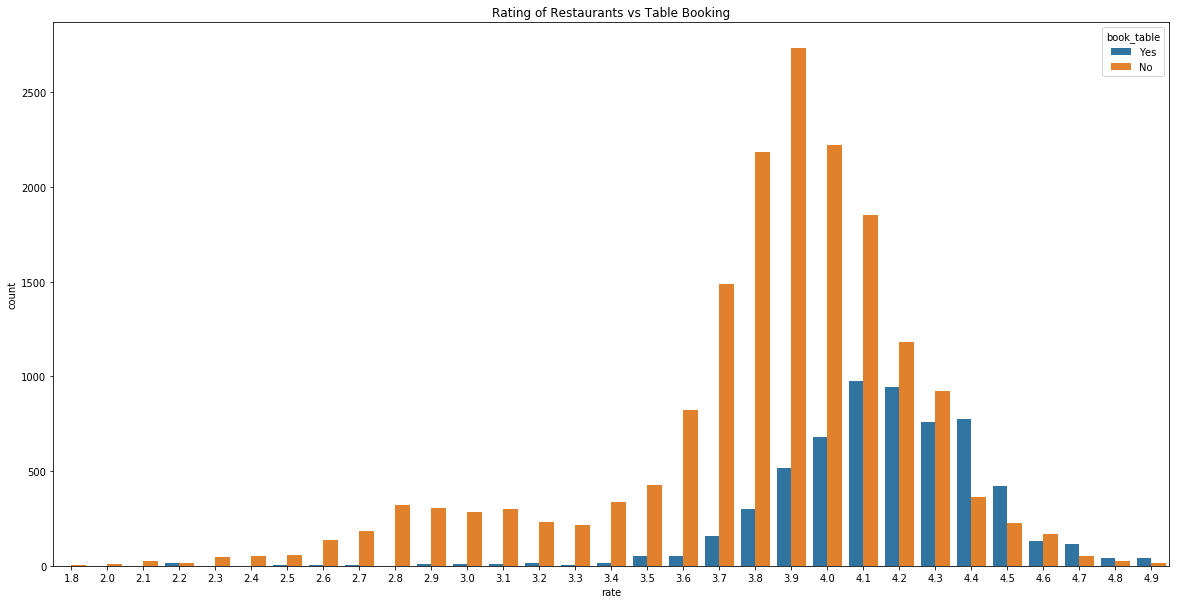

In [32]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='rate',hue='book_table',data=data)
plt.title('Rating of Restaurants vs Table Booking')
plt.show()

* Analysis of Restaurants based on their online order and how rating is related to it

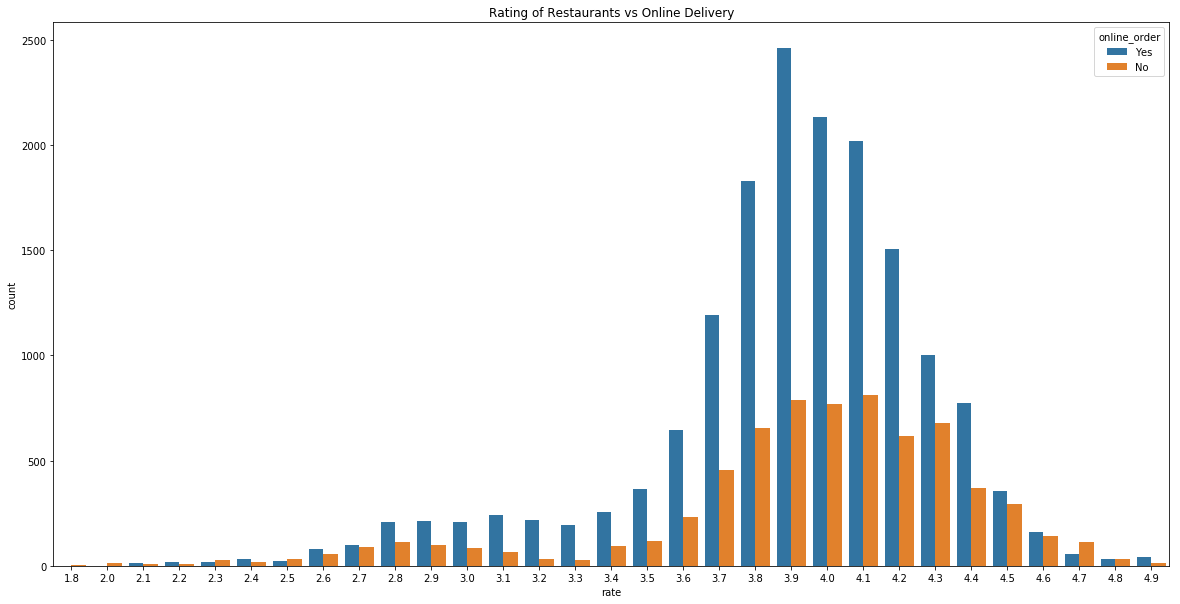

In [33]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='rate',hue='online_order',data=data)
plt.title('Rating of Restaurants vs Online Delivery')
plt.show()

It is Clearly visible that table Booking doesnot affect much to a restaurant ratings in comparison to online delivery. People tend to prefer order online since they can get various offers from it. That's why online delivery is more important for restaurants in bangalore to flourish

# Analysis of Restaurants based on their Location

In [34]:
print("All unique locations of restaurants in Bangalore")
data.location.unique()

All unique locations of restaurants in Bangalore


array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [35]:
print("Count of restaurants at unique locations")
locationCount=data['location'].value_counts().sort_values(ascending=True)
locationCount

Count of restaurants at unique locations


KR Puram                            1
Kanakapura Road                     2
Rajarajeshwari Nagar                2
Yelahanka                           2
Magadi Road                         2
West Bangalore                      2
North Bangalore                     3
Central Bangalore                   3
Jalahalli                           3
Mysore Road                         4
Uttarahalli                         4
Rammurthy Nagar                     6
East Bangalore                      8
CV Raman Nagar                     14
City Market                        14
Vijay Nagar                        15
Old Madras Road                    16
Sankey Road                        17
Sanjay Nagar                       17
Koramangala                        17
South Bangalore                    19
Sahakara Nagar                     20
Langford Town                      22
RT Nagar                           22
Hosur Road                         24
Yeshwantpur                        24
Varthur Main

In [36]:
#lets check max count
print("Maximum number of Resaturants Present at:")
count_max=max(locationCount)
for x,y in locationCount.items():
    if(y==count_max):
        print(x)

Maximum number of Resaturants Present at:
Koramangala 5th Block


In [37]:
#lets check min count
print("minimum number of Restaurants present at:")
min_count=min(locationCount)
for x,y in locationCount.items():
    if(y==min_count):
        print(x)

minimum number of Restaurants present at:
KR Puram


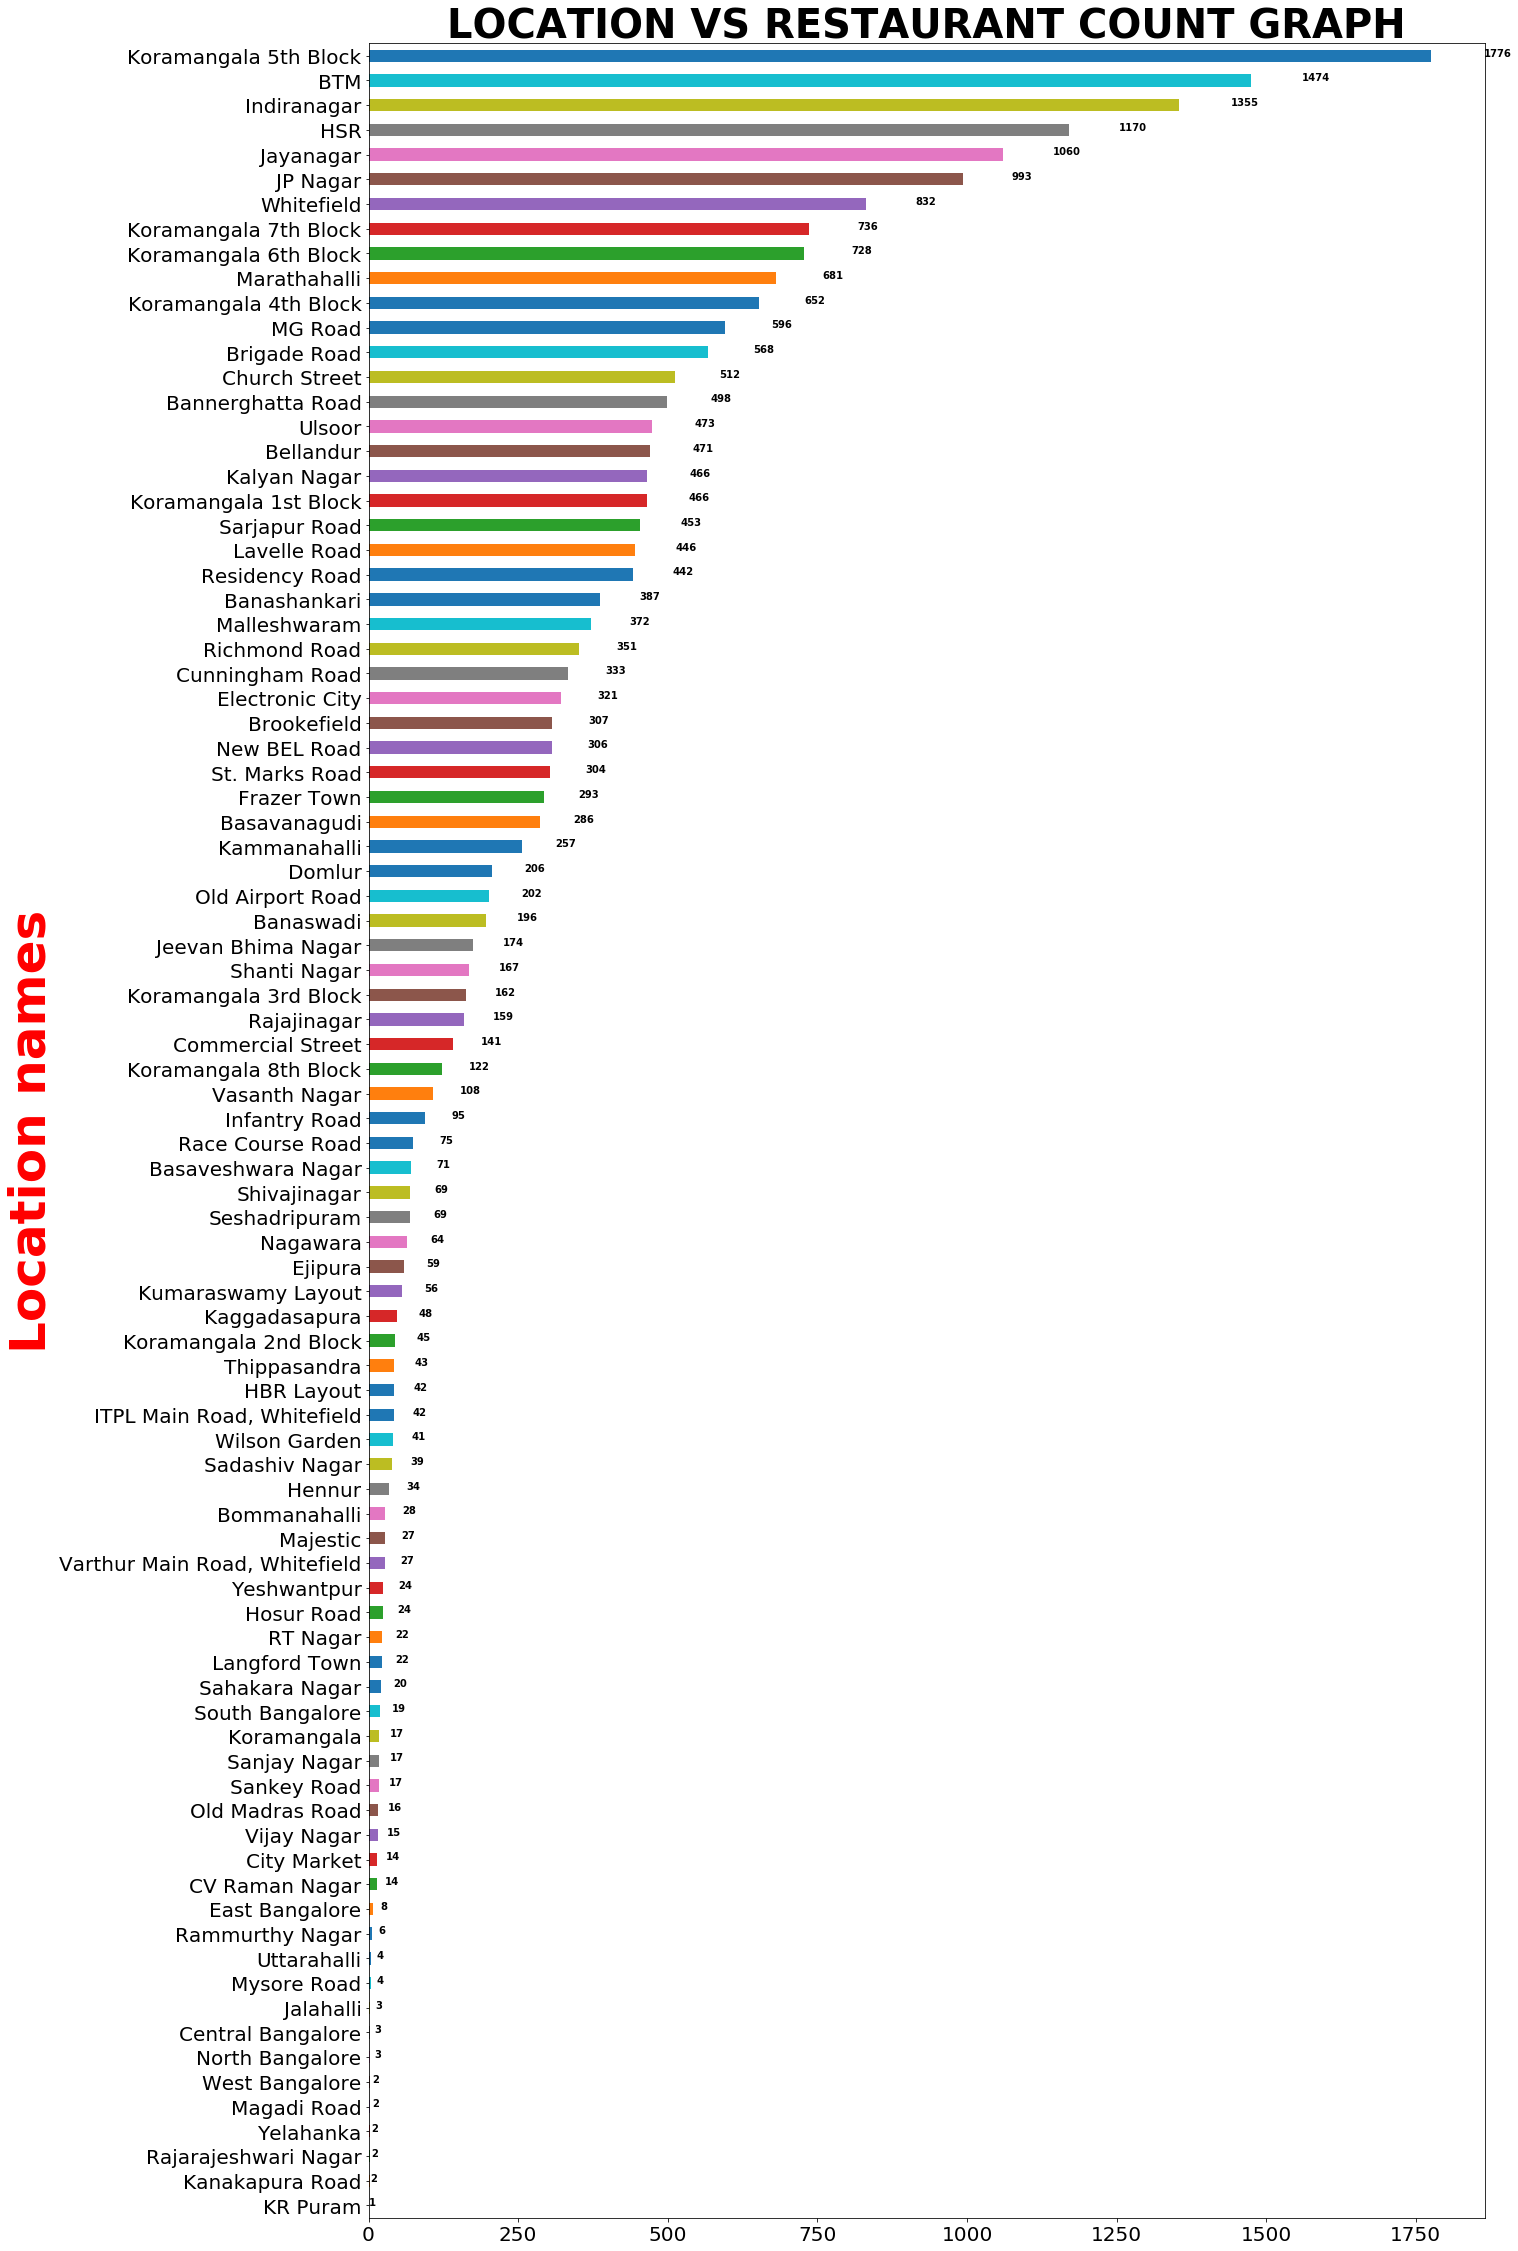

In [38]:
fig=plt.figure(figsize=(20,40))
locationCount.plot(kind="barh",fontsize=20)
plt.ylabel("Location names",fontsize=50,color="red",fontweight='bold')
plt.title("LOCATION VS RESTAURANT COUNT GRAPH",fontsize=40,color="BLACK",fontweight='bold')
for v in range(len(locationCount)):
    #plt.text(x axis location ,y axis location ,text value ,other parameters......)
    plt.text(v+locationCount[v],v,locationCount[v],fontsize=10,color="BLACK",fontweight='bold')

# Analysis of Restaurants based on their Dining Type

In [39]:
print("All different dining type restaurants")
data['listed_in(type)'].unique()

All different dining type restaurants


array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [40]:
print("Count of All different dining type restaurants")
restaurantTypeCount=data['listed_in(type)'].value_counts().sort_values(ascending=True)
restaurantTypeCount

Count of All different dining type restaurants


Pubs and bars           523
Buffet                  754
Drinks & nightlife      879
Cafes                  1066
Desserts               1364
Dine-out               8009
Delivery              10664
Name: listed_in(type), dtype: int64

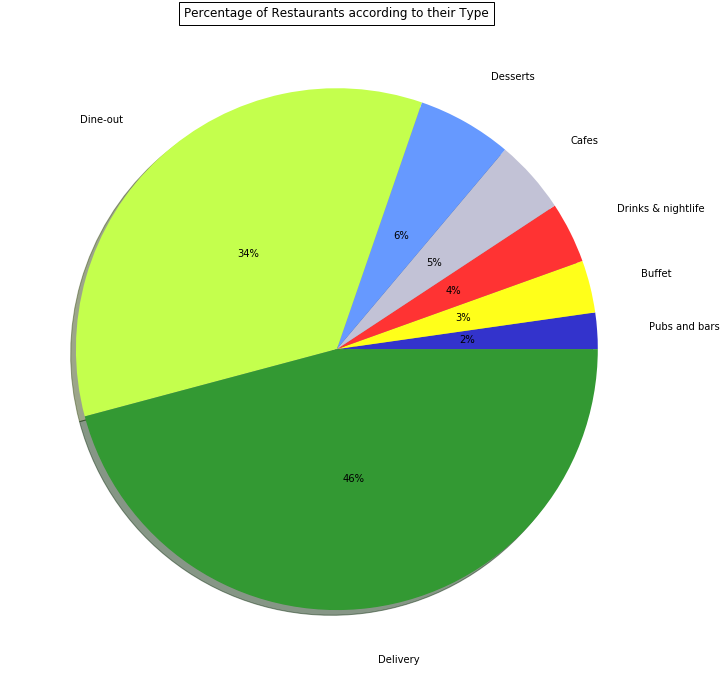

In [41]:
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Type", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

# Analysis of Restaurants based on their Subcity Type

In [42]:
CityCount=data['listed_in(city)'].value_counts().sort_values(ascending=True)
CityCount

New BEL Road              284
Electronic City           320
Banashankari              373
Rajajinagar               378
Malleshwaram              498
Sarjapur Road             503
Bellandur                 507
Kalyan Nagar              518
Kammanahalli              532
Bannerghatta Road         543
Frazer Town               545
Brookefield               600
Basavanagudi              603
Marathahalli              620
Whitefield                632
HSR                       743
Old Airport Road          757
JP Nagar                  817
Residency Road            843
Lavelle Road              896
Brigade Road              969
Church Street             983
MG Road                  1009
Indiranagar              1015
Jayanagar                1058
Koramangala 6th Block    1253
Koramangala 5th Block    1311
Koramangala 4th Block    1348
Koramangala 7th Block    1381
BTM                      1420
Name: listed_in(city), dtype: int64

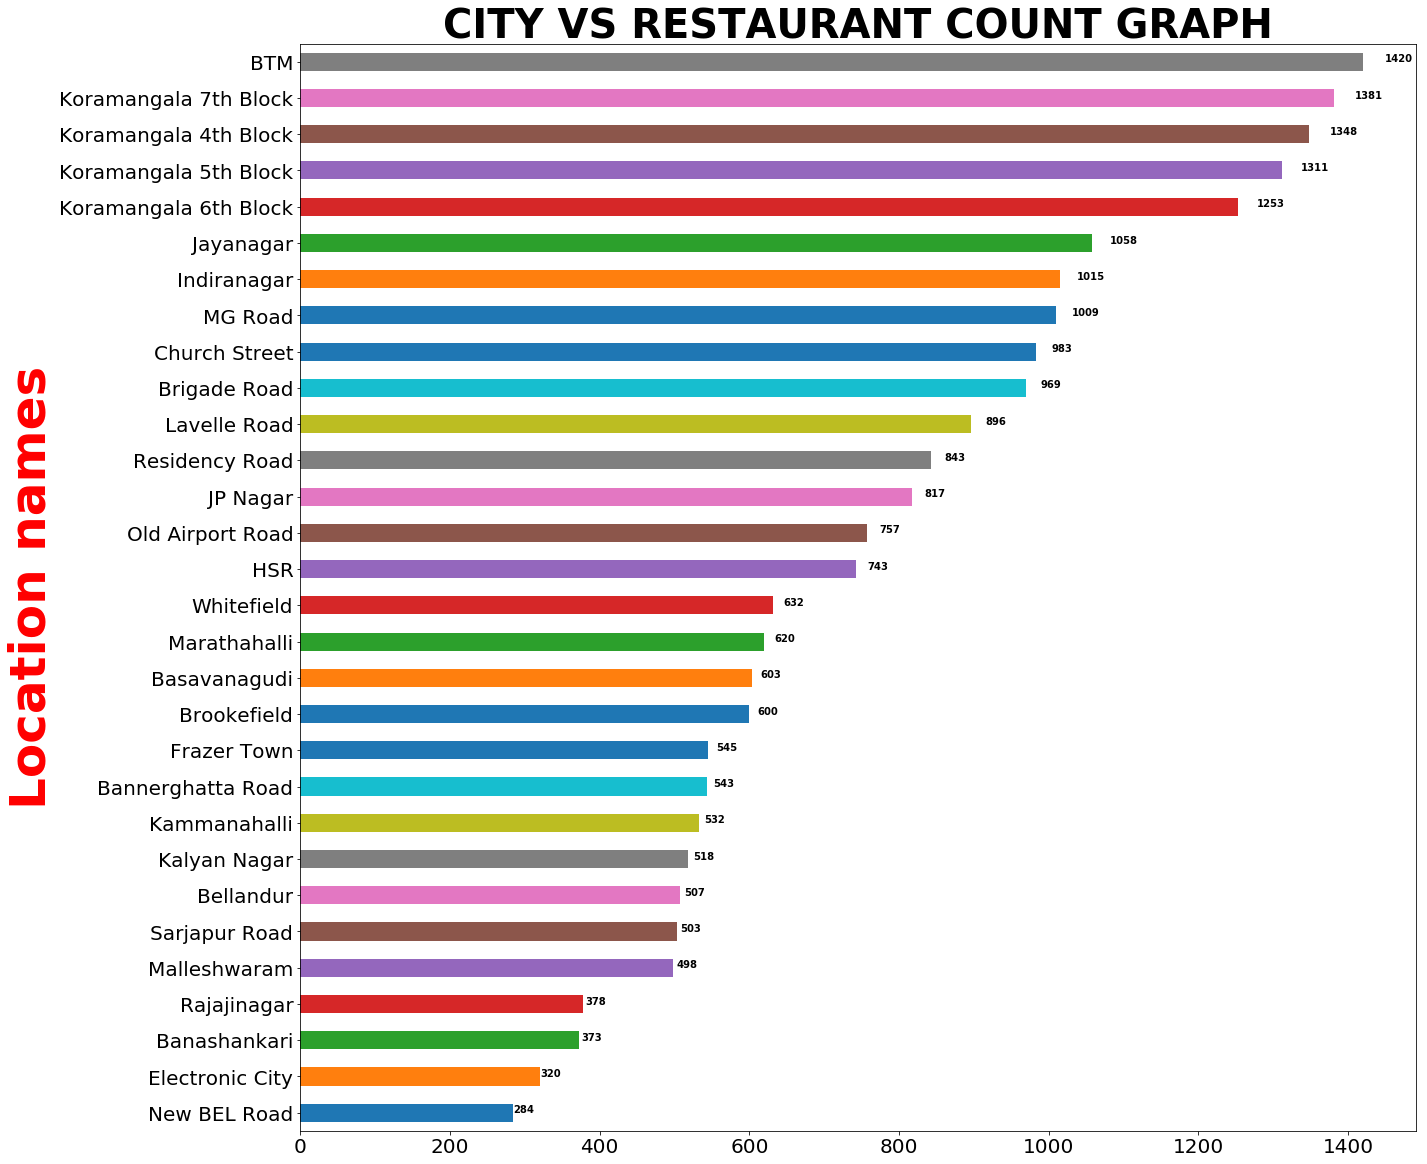

In [43]:
fig=plt.figure(figsize=(20,20))
CityCount.plot(kind="barh",fontsize=20)
plt.ylabel("Location names",fontsize=50,color="red",fontweight='bold')
plt.title("CITY VS RESTAURANT COUNT GRAPH",fontsize=40,color="BLACK",fontweight='bold')
for v in range(len(CityCount)):
    #plt.text(x axis location ,y axis location ,text value ,other parameters......)
    plt.text(v+CityCount[v],v,CityCount[v],fontsize=10,color="BLACK",fontweight='bold')

Text(0.5, 1.0, 'COST FOR 2 PEOPLE VS RESTAURANT  GRAPH')

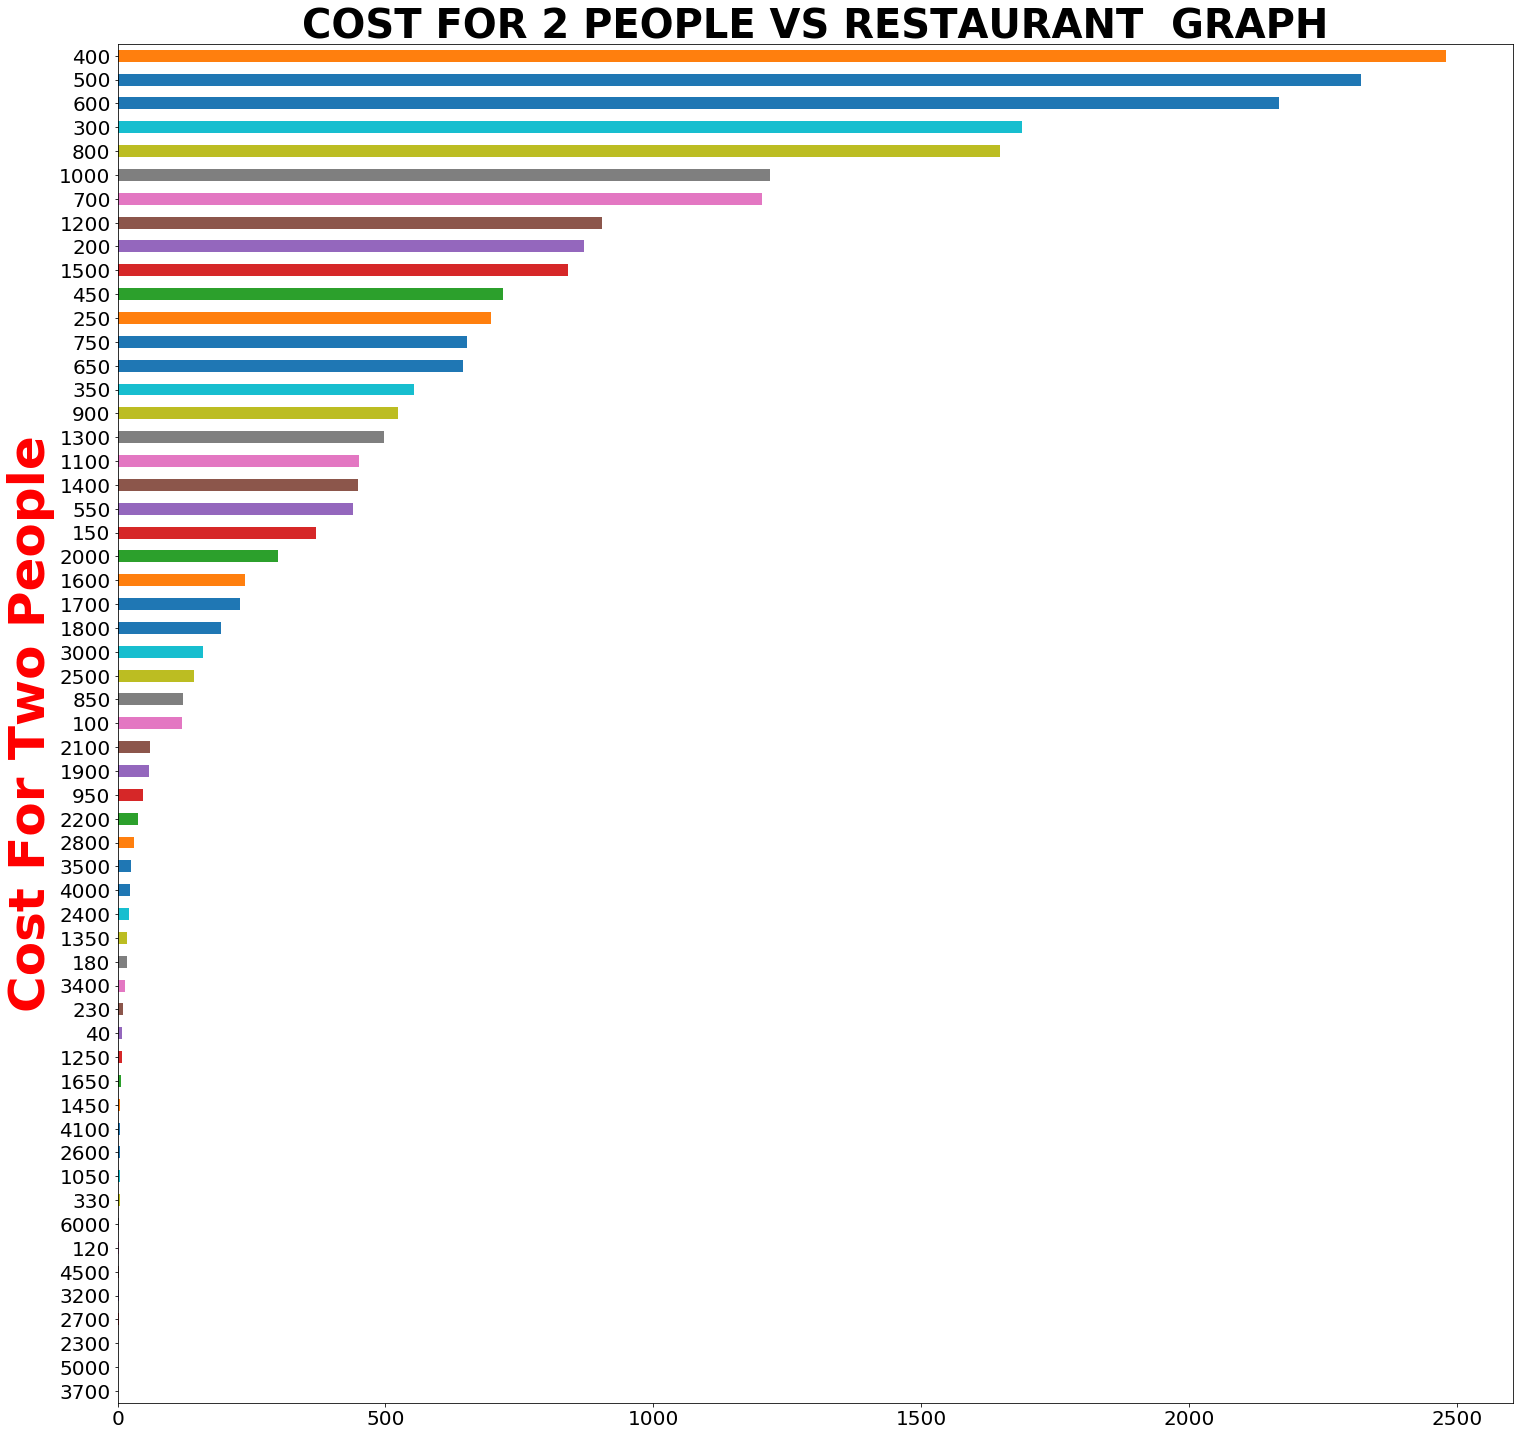

In [44]:
CostCount=data['approx_cost(for two people)'].value_counts().sort_values(ascending=True)
fig=plt.figure(figsize=(25,25))
CostCount.plot(kind="barh",fontsize=20)
plt.ylabel("Cost For Two People",fontsize=50,color="red",fontweight='bold')
plt.title("COST FOR 2 PEOPLE VS RESTAURANT  GRAPH",fontsize=40,color="BLACK",fontweight='bold')


In [45]:
data.votes.describe()

count    23259.000000
mean       605.388710
std       1113.483548
min          0.000000
25%        104.000000
50%        225.000000
75%        597.000000
max      16832.000000
Name: votes, dtype: float64

In [46]:
data[((data.votes>=300)==True) & ((data.rate>=4)==True)].describe()

,rate,votes,approx_cost(for two people)
count,7504.000000,7504.000000,7504.00000
mean,4.243790,1450.868204,1037.55597
std,0.191193,1627.246752,568.63117
min,4.000000,300.000000,100.00000
25%,4.100000,512.000000,600.00000
50%,4.200000,876.500000,1000.00000
75%,4.400000,1774.000000,1400.00000
max,4.900000,16832.000000,5000.00000


# Analysis of Restaurants based on their FoodType

In [47]:
print("all different cuisines:")
cuisines = set()
for i in data['cuisines']:
    for j in str(i).split(', '):
        cuisines.add(j)
cuisines

all different cuisines:


{'Afghan',
 'Afghani',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'Assamese',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bohri',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'German',
 'Goan',
 'Greek',
 'Grill',
 'Gujarati',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Iranian',
 'Italian',
 'Japanese',
 'Jewish',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Konkan',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Eastern',
 'North Indian',
 'Oriya',
 'Parsi',
 'Pizza',
 'Portuguese',
 'Rajasthani',
 'Roast Chicken',
 'Rolls',
 'Russian',
 'Salad',
 'Sandwi

### Get All the North Indian Food Serving Restaurants

In [48]:
NorthIndianFoodRestaurants = data[data['cuisines'].str.contains('North Indian', case=False, regex=True,na=False)]
NorthIndianFoodRestaurants.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari


### Get All the Chinese Food Serving Restaurants

In [49]:
ChineseFoodRestaurants = data[data['cuisines'].str.contains('Chinese|Momos', case=False, regex=True,na=False)]
ChineseFoodRestaurants.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
12,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
16,Catch-up-ino,Yes,No,3.9,133,Banashankari,Cafe,"Momos, Mushroom Bruschettas, Jalapeno Cheeseba...","Cafe, Fast Food, Continental, Chinese, Momos",800,"[('Rated 1.0', ""RATED\n This place is right o...",[],Cafes,Banashankari


### Get All the South Indian Food Serving Restaurants

In [50]:
SouthIndianFoodRestaurants = data[data['cuisines'].str.contains('South Indian', case=False, regex=True,na=False)]
SouthIndianFoodRestaurants.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
38,Empire Restaurant,Yes,No,4.4,4884,Jayanagar,Casual Dining,"Chicken Tikka Masala, Mutton Keema Dosa, Mutto...","North Indian, Mughlai, South Indian, Chinese",750,"[('Rated 3.0', 'RATED\n Grill and tandoori is...",[],Delivery,Banashankari
53,Biryanis And More,Yes,No,4.0,618,Jayanagar,Casual Dining,"Prawn Biryani, Dragon Chicken, Chicken Boneles...","Biryani, North Indian, Chinese, Andhra, South ...",750,"[('Rated 5.0', ""RATED\n Dear Biryanis and mor...",[],Delivery,Banashankari
76,Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1,558,Basavanagudi,Quick Bites,"Benne Dosa, Mirchi Bajji, Filter Coffee, Poha,...",South Indian,150,"[('Rated 4.0', 'RATED\n My go-to benne dosa p...","['Benne Dose', 'Benne Kali Dose', 'Open Dose',...",Delivery,Banashankari
79,Upahar Sagar,No,No,3.8,39,Banashankari,Quick Bites,Masala Dosa,"South Indian, Chinese, North Indian",350,"[('Rated 2.0', ""RATED\n Hi,\nWe had masala pu...",[],Delivery,Banashankari


### Get All the Italian Food Serving Restaurants

In [51]:

ItalianFoodRestaurants = data[data['cuisines'].str.contains('Italian|Pizza', case=False, regex=True,na=False)]
ItalianFoodRestaurants.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
11,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600,"[('Rated 1.0', ""RATED\n \n\nHorrible. Not even...",[],Cafes,Banashankari


### Get All the Mexican Food Serving Restaurants

In [52]:
MexicanFoodRestaurants = data[data['cuisines'].str.contains('Mexican', case=False, regex=True,na=False)]
MexicanFoodRestaurants.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
14,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Cafes,Banashankari
60,Peppy Peppers,No,No,4.2,244,Banashankari,Casual Dining,"Pasta, Pepper Pizza, Paneer Pizza, Peppy Panee...","Italian, North Indian, Mexican",800,"[('Rated 4.0', ""RATED\n \nPeppy Peppers is loc...",[],Delivery,Banashankari
67,Gustoes Beer House,No,No,4.1,868,Banashankari,Pub,"Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...","Continental, Italian, Mexican, North Indian, C...",1200,"[('Rated 5.0', 'RATED\n Has a really calm roo...",[],Delivery,Banashankari


### Get All the American Food Serving Restaurants

In [53]:
AmericanFoodRestaurants = data[data['cuisines'].str.contains('American|Burger', case=False, regex=True,na=False)]
AmericanFoodRestaurants.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
18,T3H Cafe,No,No,3.9,93,Banashankari,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
31,Foodiction,Yes,No,2.8,506,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
42,McDonald's,Yes,No,3.9,286,Banashankari,Quick Bites,"Burgers, Fries, Hot Chocolate","Burger, Fast Food",500,"[('Rated 4.0', 'RATED\n Perfect place to have...",[],Delivery,Banashankari
55,FreshMenu,Yes,No,3.9,627,Banashankari,Delivery,"Salads, Sandwiches, Salad, Thai Rice, Pasta, N...","Healthy Food, Chinese, Biryani, North Indian, ...",450,"[('Rated 5.0', 'RATED\n What: continental foo...","[""Egg 'n' Chicken Ham Breakwich"", 'Maple Panca...",Delivery,Banashankari
153,KFC,Yes,No,3.8,505,Banashankari,Quick Bites,"Burgers, French Fries","Burger, Fast Food",450,"[('Rated 4.0', 'RATED\n KFC chicken yummy as ...",[],Delivery,Banashankari


### Get All the Mughlai Food Serving Restaurants

In [54]:
MughlaiFoodRestaurants = data[data['cuisines'].str.contains('Mughlai', case=False, regex=True,na=False)]
MughlaiFoodRestaurants.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
38,Empire Restaurant,Yes,No,4.4,4884,Jayanagar,Casual Dining,"Chicken Tikka Masala, Mutton Keema Dosa, Mutto...","North Indian, Mughlai, South Indian, Chinese",750,"[('Rated 3.0', 'RATED\n Grill and tandoori is...",[],Delivery,Banashankari
151,Roll N Rock,Yes,No,3.8,124,Kumaraswamy Layout,Quick Bites,"Rolls, Paratha, Chicken Biryani","Chinese, North Indian, Mughlai, Rolls",400,"[('Rated 3.0', ""RATED\n Ordered paneer roll t...",[],Delivery,Banashankari
152,BOX8- Desi Meals,Yes,No,4.1,340,Banashankari,"Takeaway, Delivery","Paratha, Mughlai Chicken, Masala Lemonade, But...","North Indian, Mughlai, Fast Food",500,"[('Rated 4.0', 'RATED\n So recently during my...",[],Delivery,Banashankari
159,Wahab,Yes,No,3.7,97,Jayanagar,Quick Bites,"Chicken Biryani, Rolls","North Indian, Mughlai, Chinese",350,"[('Rated 3.0', 'RATED\n Ordered chicken kabab...",[],Delivery,Banashankari


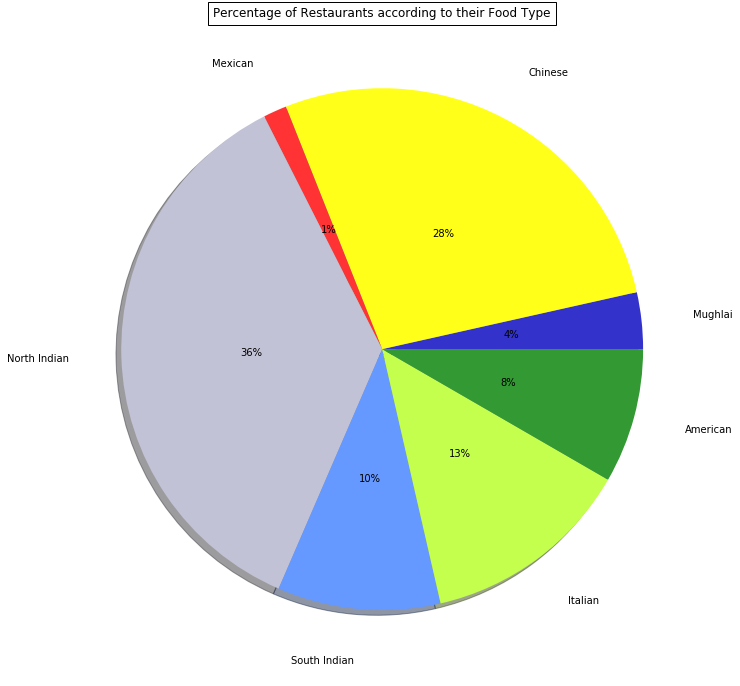

In [55]:
#pie chart showing % of various Food serving Type Restaurants
slices=[MughlaiFoodRestaurants.shape[0],
        ChineseFoodRestaurants.shape[0],
        MexicanFoodRestaurants.shape[0],
        NorthIndianFoodRestaurants.shape[0],
        SouthIndianFoodRestaurants.shape[0],
        ItalianFoodRestaurants.shape[0],
        AmericanFoodRestaurants.shape[0]]
labels=['Mughlai','Chinese','Mexican','North Indian','South Indian','Italian','American']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Food Type", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

# Analysis of Restaurants Whether Single Cuisine or Multi Cusine

In [56]:
SingleTypeofFoodServing = data[data['cuisines'].str.contains(',', case=False, regex=True,na=False)==False]


In [57]:
MultipleTypeofFoodServing = data[data['cuisines'].str.contains(',', case=False, regex=True,na=False)]


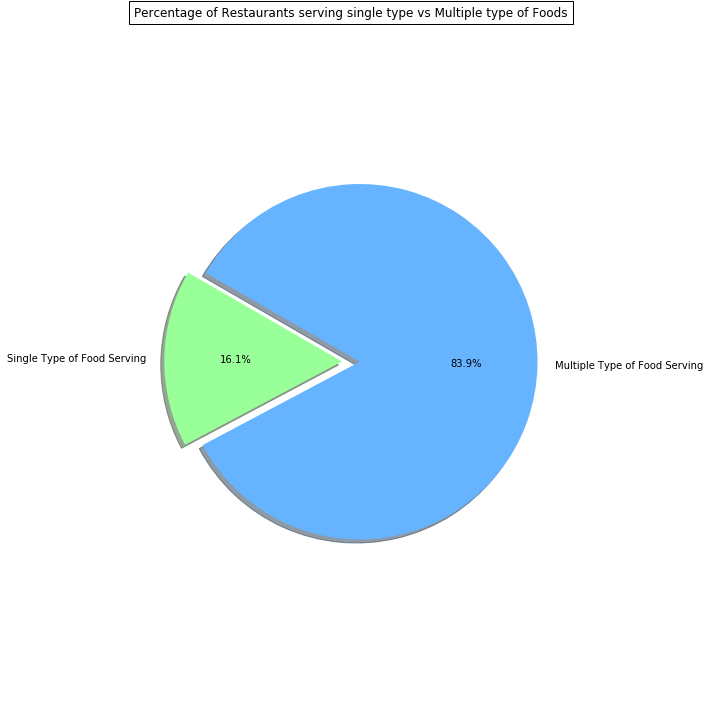

In [58]:
# Pie chart showing Percentage of Restaurants serving single type vs Multiple type of Foods
labels = ['Single Type of Food Serving', 'Multiple Type of Food Serving', ]
sizes = [SingleTypeofFoodServing.shape[0], MultipleTypeofFoodServing.shape[0]]

explode = (0, 0.1)

colors = ['#99ff99','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=150)

ax1.axis('equal')
plt.title("Percentage of Restaurants serving single type vs Multiple type of Foods", bbox={'facecolor':'2', 'pad':5})
fig1.set_size_inches(10,10)
plt.tight_layout()
plt.show()

#  MOST LIKED DISHES IN BANGALORE

#### Let's store the dishes liked in seperate list and then analyse it. 

In [59]:
import re
data=data[data['dish_liked'].notnull()]
data.index=range(data.shape[0])
likes=[]
for i in range(data.shape[0]):
    splited_array=re.split(',',data['dish_liked'][i])
    for item in splited_array:
        likes.append(item)




In [60]:
print("Count of Most liked dishes of Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(20)

Count of Most liked dishes of Bangalore


 Pasta              2695
 Pizza              1916
 Cocktails          1882
 Burgers            1738
 Mocktails          1623
 Biryani            1309
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1171
 Fish               1118
 Paratha            1108
 Salads             1057
 Chicken Biryani    1004
Cocktails            891
 Fries               877
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
dtype: int64

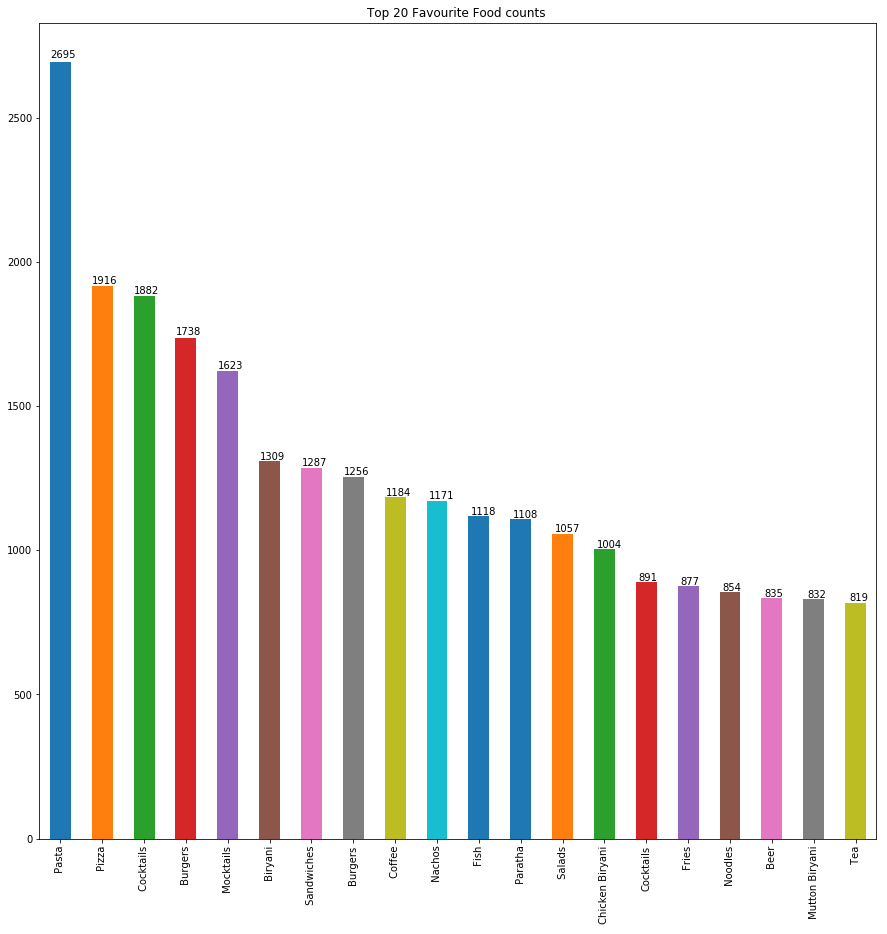

In [61]:
ax = favourite_food.nlargest(n=20, keep='first').plot('bar',figsize=(15,15),title = 'Top 20 Favourite Food counts ')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    

### ANALYSIS OF BIGGEST FOOD CHAINS OF BANGALORE

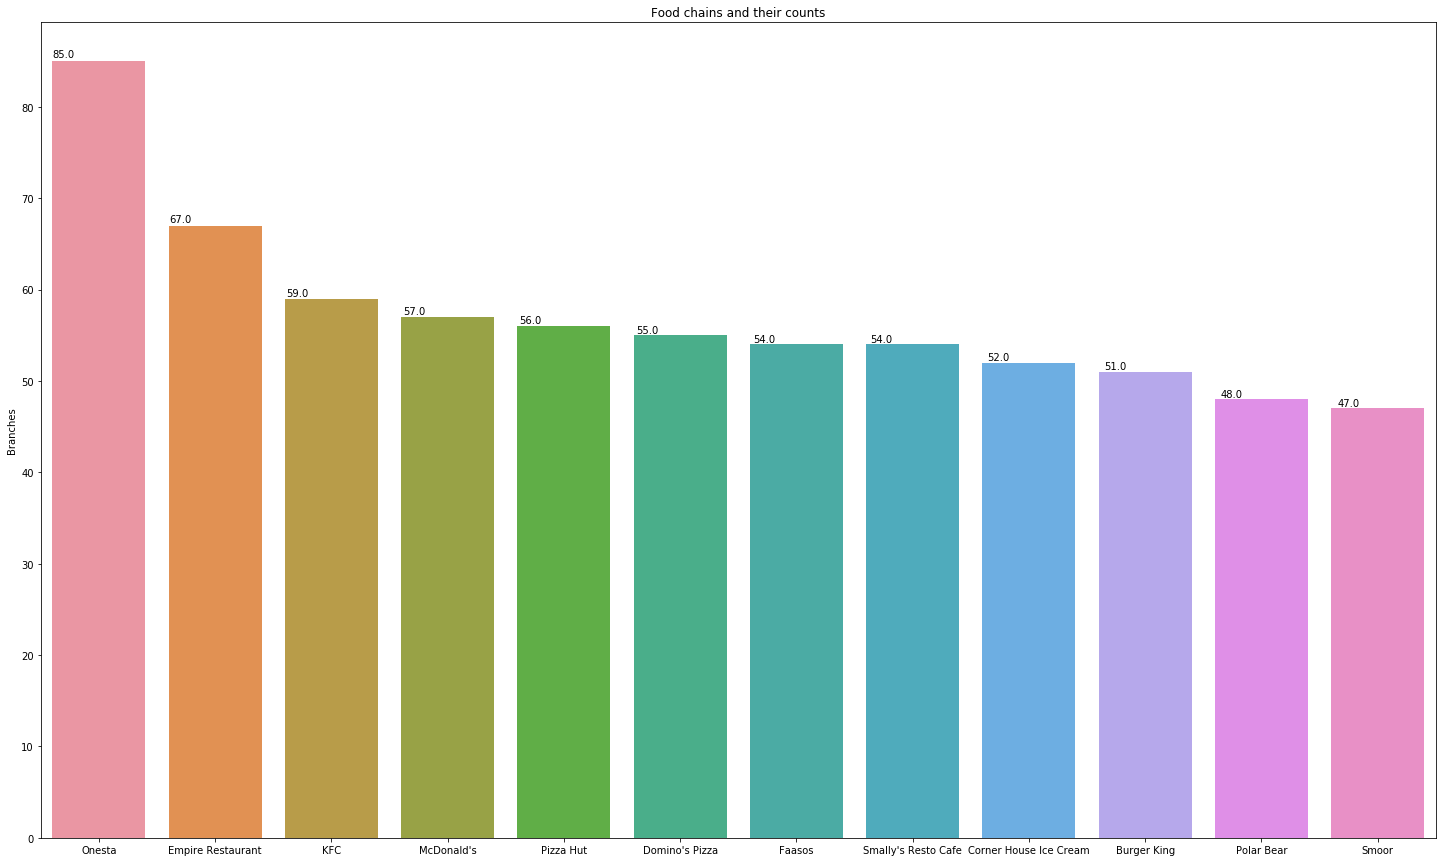

In [62]:
branches = data.groupby(['name']).size().to_frame('count').reset_index().sort_values(['count'],ascending=False)
ax = sns.barplot(x='name', y='count', data=branches[:12])
plt.xlabel('')
plt.ylabel('Branches')
plt.title('Food chains and their counts')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
fig = plt.gcf()
fig.set_size_inches(25,15)

* Onesta has highest number of chains in Bangalore